Name: Vivek Nirmal <br>
Student ID: 5510085

1. Clean the Dataset

In [ ]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To display plots inline within the notebook
%matplotlib inline

# Suppress warnings to keep the output clean
warnings.filterwarnings('ignore')

# Load the NYC Airbnb dataset
df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
# Display the first few rows to understand the structure of the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Print information about the data types and non-null counts to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Check for missing values in each column
print(f"Missing values per column:\n{df.isnull().sum()}")

sh=df.shape
print(f'\nShape originally: {sh}')

Missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Shape originally: (48895, 16)


In [ ]:
# We consider 'id', name', and 'host_name' as critical columns.
# If any of these columns have missing values, the row is dropped.

df = df.dropna(subset=['id', 'name', 'host_name'])
# Drop rows where 'id', 'name', or 'host_name' are missing (critical fields)

In [ ]:
#Fill missing values in 'reviews_per_month' with 0.
# The assumption is that if there is no value, the property has not been reviewed yet.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Convert 'last_review' to datetime and fill missing dates with a placeholder date '1900-01-01'.
# This placeholder can be used to identify listings with no reviews easily.
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'] = df['last_review'].fillna(pd.to_datetime('1900-01-01'))

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1900-01-01,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1900-01-01,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1900-01-01,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1900-01-01,0.0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,1900-01-01,0.0,1,23


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
#Final Check for Missing Values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


2: Restructure the Dataset

In [ ]:
# Categorize the 'price' into bins: Low, Medium, High, and Luxury
# This helps in analyzing price distribution across different ranges
price_bins = [0, 50, 150, 300, float('inf')]
price_labels = ['Low', 'Medium', 'High', 'Luxury']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

price_room_type_summary = df.groupby(['price_category', 'room_type'],observed=False).size().unstack(fill_value=0)
print("\nListings Count by Price Category and Room Type:")
price_room_type_summary


Listings Count by Price Category and Room Type:


room_type,Entire home/apt,Private room,Shared room
price_category,,,
Low,188,5693,661
Medium,11761,15188,428
High,10464,1064,45
Luxury,2978,354,23


In [ ]:

#The new column is named location_info to clearly indicate it represents the combined geographical information.
#By combining these columns and removing the originals, the dataset is simplified while still retaining the relevant geographical information.

#Create a new column named 'location_info' that concatenates 'neighbourhood' and 'neighbourhood_group'
df['location_info'] = df['neighbourhood'] + ', ' + df['neighbourhood_group']

# Drop the original 'neighbourhood' column as it is no longer needed
df = df.drop(['neighbourhood'], axis=1)

In [ ]:
# Transform the data into long format to facilitate certain types of analyses
# This restructures latitude and longitude into a more manageable format
df_long = df.melt(id_vars=['id', 'name', 'location_info'],
                  value_vars=['latitude', 'longitude'],
                  var_name='location_type',
                  value_name='location_type_value')


df = df.set_index('id')
df_long.head()

,id,name,location_info,location_type,location_type_value
0,2539,Clean & quiet apt home by the park,"Kensington, Brooklyn",latitude,40.64749
1,2595,Skylit Midtown Castle,"Midtown, Manhattan",latitude,40.75362
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,"Harlem, Manhattan",latitude,40.80902
3,3831,Cozy Entire Floor of Brownstone,"Clinton Hill, Brooklyn",latitude,40.68514
4,5022,Entire Apt: Spacious Studio/Loft by central park,"East Harlem, Manhattan",latitude,40.79851


Task 3: Apply aggregation and summarization methods

In [ ]:
# Aggregation by neighbourhood_group to know prices by the area
neighbourhood_summary = df.groupby('location_info').agg({
    'price': 'mean',
    'minimum_nights': 'mean'

    '''
    'number_of_reviews': 'mean',
    'reviews_per_month': 'mean',
    'availability_365': 'mean'
    '''

}).rename(columns={'price': 'avg_price', 'minimum_nights': 'avg_min_nights'})
print(neighbourhood_summary)

# Summarize by room type to know the prices based on room types
room_type_summary = df.groupby('room_type')['reviews_per_month'].agg(['mean', 'median'])
print(room_type_summary)


                               avg_price  avg_min_nights
location_info                                           
Allerton, Bronx                87.595238        2.214286
Arden Heights, Staten Island   67.250000        9.500000
Arrochar, Staten Island       115.000000        2.761905
Arverne, Queens               171.779221        1.649351
Astoria, Queens               117.187778        6.036667
...                                  ...             ...
Windsor Terrace, Brooklyn     138.993631        8.713376
Woodhaven, Queens              67.170455        2.795455
Woodlawn, Bronx                60.090909        1.454545
Woodrow, Staten Island        700.000000        7.000000
Woodside, Queens               85.097872       10.314894

[221 rows x 2 columns]
                     mean  median
room_type                        
Entire home/apt  1.045709    0.35
Private room     1.143699    0.40
Shared room      1.074271    0.41


Task 4: Exploratory Data Analysis (EDA)

In [ ]:
#Describe key statistics of numerical columns
print("Descriptive Statistics:\n", df.describe())

#Analyze the distribution of room types across neighbourhood groups
room_type_distribution = df.groupby(['location_info', 'room_type']).size().unstack()
print("Room Type Distribution:\n", room_type_distribution)

# Distribution analysis for selected columns
print(df[['price', 'minimum_nights', 'reviews_per_month']].describe())

# Correlation matrix
correlation = df[['price', 'minimum_nights', 'reviews_per_month']].corr()
print("Correlation matrix:\n", correlation)



# Identify outliers in 'price' using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in price:\n {outliers}")


Descriptive Statistics:
             host_id      latitude     longitude         price  minimum_nights  \
count  4.885800e+04  48858.000000  48858.000000  48858.000000    48858.000000   
mean   6.763169e+07     40.728941    -73.952170    152.740309        7.012444   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.818669e+06     40.690090    -73.983070     69.000000        1.000000   
50%    3.079133e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763107    -73.936280    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   
std    7.862389e+07      0.054528      0.046159    240.232386       20.019757   

       number_of_reviews                    last_review  reviews_per_month  \
count       48858.000000                          48858       48858.000000   
mean           23.273098  1994-05-12 15:05:37.320397952           1.091124   
min        

Task 5: Data Visualization

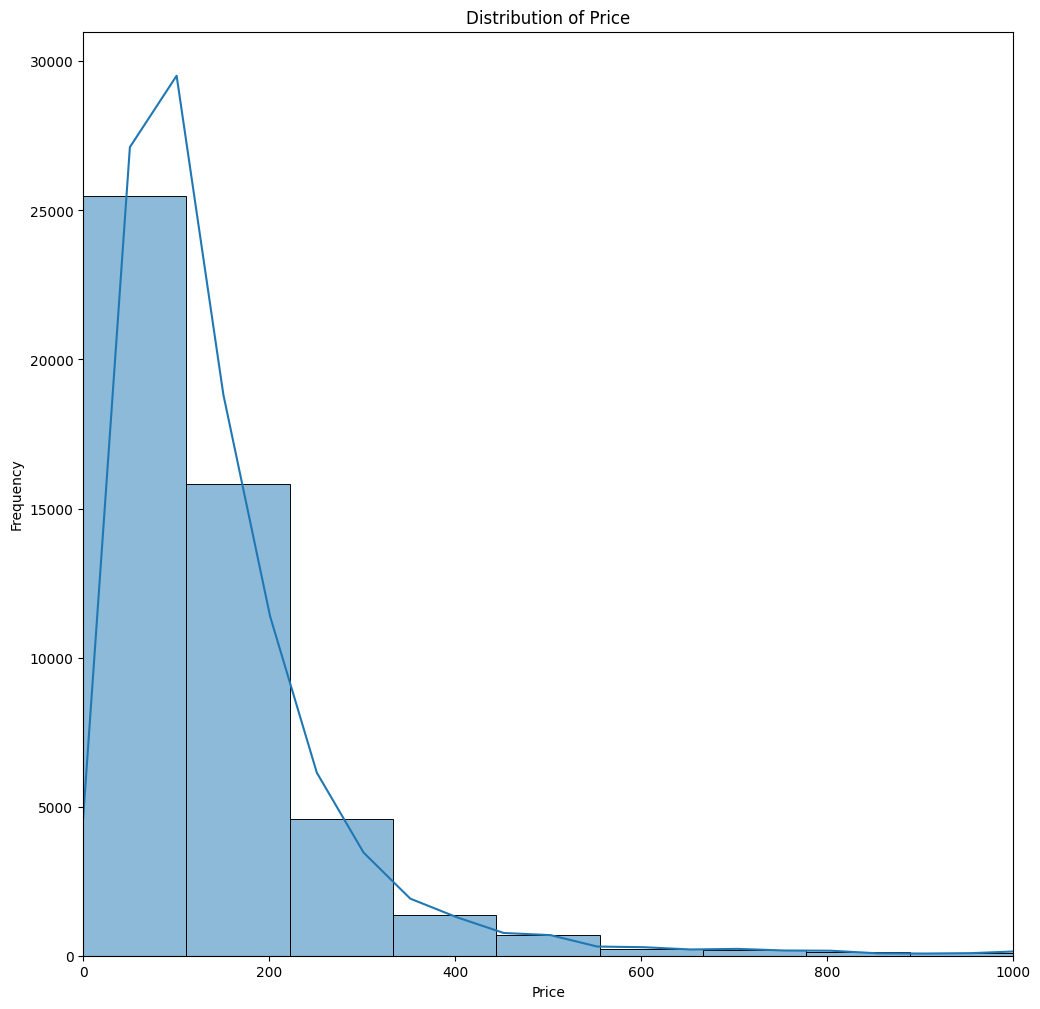

In [ ]:
#Plot the distribution of 'price' to understand the spread and skewness
plt.figure(figsize=(12, 12))
sns.histplot(df['price'], bins=90, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 1000)  # Limit to reduce the effect of outliers
plt.show()


Correlation Matrix:


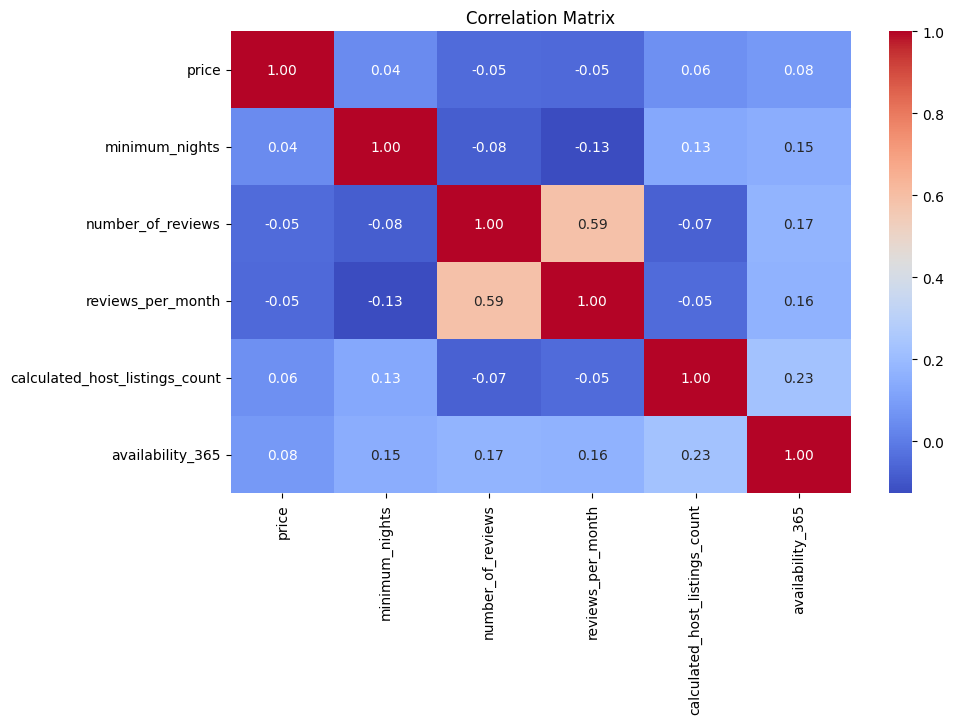

In [ ]:
#Display the correlation matrix as a heatmap to identify significant correlations
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews',
                                 'reviews_per_month', 'calculated_host_listings_count',
                                 'availability_365']].corr()
print("\nCorrelation Matrix:")
correlation_matrix
#Showing relationships between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

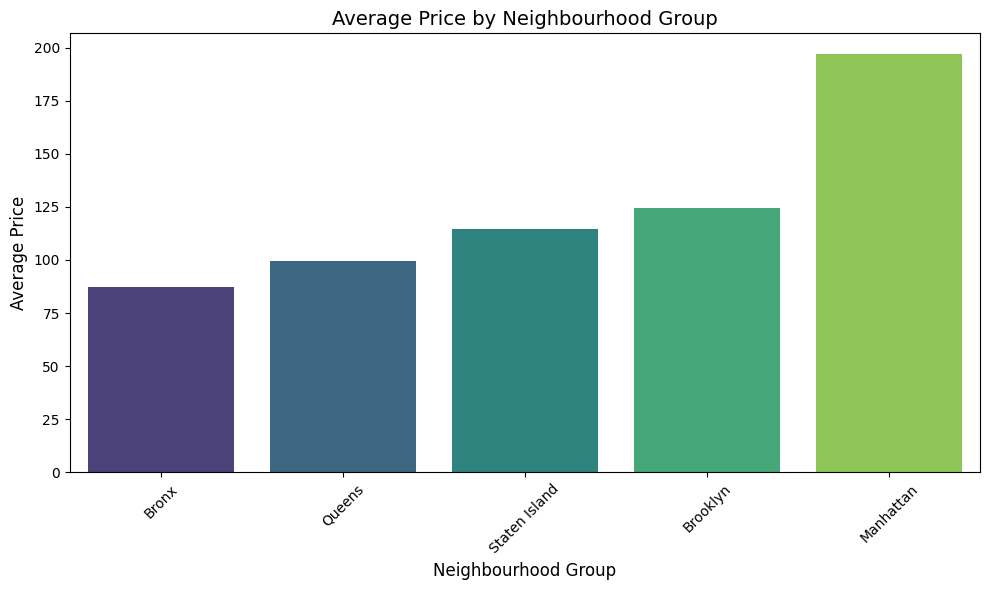

In [ ]:
#Bar plot for Average Price by Neighbourhood Group
# Calculate average prices for each neighbourhood group and sort them
avg_price_by_neighbourhood_group = df.groupby('neighbourhood_group')['price'].mean().sort_values()

#Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_neighbourhood_group.index, y=avg_price_by_neighbourhood_group.values, palette='viridis')
plt.title('Average Price by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to fit labels properly
plt.show()

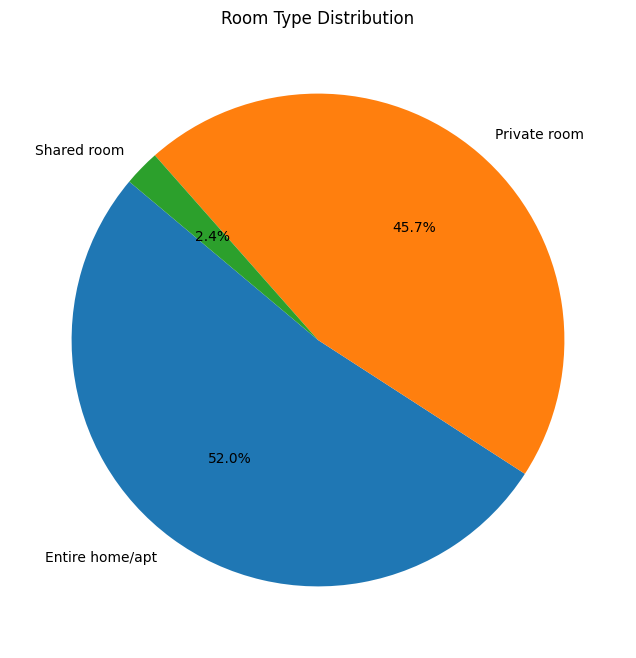

In [ ]:
#Pie chart to show the distribution of room types
room_counts = df['room_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution')
plt.show()

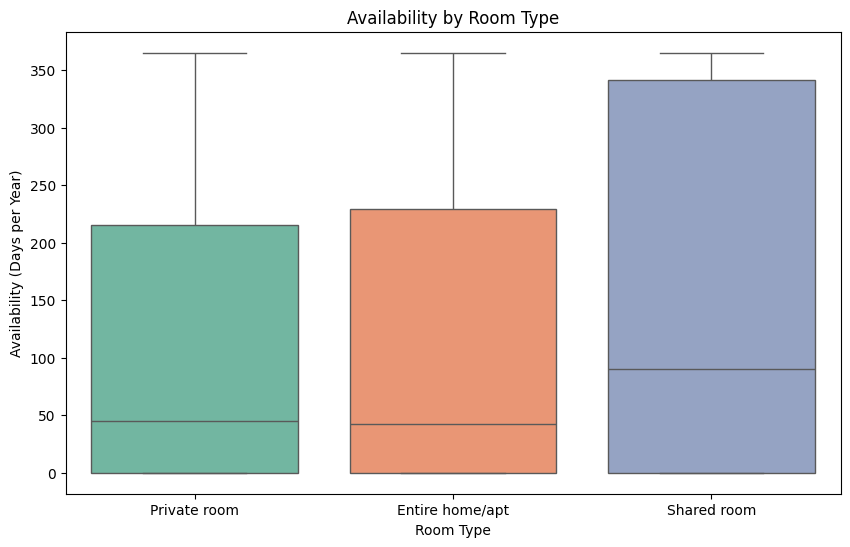

In [ ]:
#Boxplot to show availability distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='availability_365', data=df, palette='Set2')
plt.title("Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Availability (Days per Year)")
plt.show()